In [51]:
# Import section
import pandas as pd
import openpyxl
import requests
import numpy as np
import random
import hvplot.pandas
import datetime as dt
from pathlib import Path
import seaborn as sns

In [52]:
Provincial_School_data = r"C:\Users\Aarthi Manoharan\Arun\1 Project Day 1\fintech-project01\Data-Arun\Provincial_School_data_december2022.xlsx"
Provincial_School_df = pd.read_excel('Provincial_School_data_december2022.xlsx', sheet_name='SIF_2021prelim_EQAO1819_EN')
Provincial_School_df.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of School-Aged Children Who Live in Low-Income Households,"Percentage of Students Whose Parents Have No Degree, Diploma or Certificate",Extract Date
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,N/D,NaN,N/R,NaN,N/R,NaN,30,5,2-Dec-22
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,-13.0,NaN,NaN,NaN,NaN,NaN,NaN,10,0,2-Dec-22
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,30,10,2-Dec-22
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,20,5,2-Dec-22
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),490822,Boreal French Immersion Public School,Public,Not applicable,Elementary,English,JK-8,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,20,5,2-Dec-22


### From this data, you can:

Analyze the performance of individual schools and school boards, and compare them against each other.
Understand the achievement trends of students over time by looking at the change in grade 6 mathematics achievement over three years, change in grade 9 applied mathematics achievement over three years and change in grade 10 OSSLT literacy achievement over three years
Identify schools or school boards that have particularly high or low achievement levels, or that have shown significant improvement or decline over time.
Analyze the relationship between student achievement and socio-economic characteristics, such as the percentage of school-aged children living in low-income households and percentage of students whose parents have no degree, diploma or certificate.
Understand the student demographics of different schools and school boards and compare them.

In [53]:
import pandas as pd
import geoviews as gv
import geoviews.feature as gf
import hvplot.pandas
from pathlib import Path

# Read the data from the Excel file
Provincial_School_df = pd.read_excel('Provincial_School_data_december2022.xlsx', sheet_name='SIF_2021prelim_EQAO1819_EN')


school_type =  Provincial_School_df[["School Name", "Board Name" ]].groupby("School Name").sum()
# Review the DataFrame
school_type

,Board Name
School Name,
A A Wright Public School,Lambton Kent DSB
A B Ellis Public School,Rainbow DSB
A B Lucas Secondary School,Thames Valley DSB
A J Baker Public School,Thames Valley DSB
A J Charbonneau Elementary Public School,Renfrew County DSB
...,...
ÉÉC Samuel-de-Champlain,CS catholique MonAvenir
ÉÉC du Bon-Berger,CS catholique MonAvenir
ÉÉC du Sacré-Coeur-Georgetown,CS catholique MonAvenir


In [54]:
Board_type =  Provincial_School_df[["Board Name" ]].groupby("Board Name").mean()
Board_type

""
Board Name
Algoma DSB
Algonquin and Lakeshore CDSB
Avon Maitland DSB
Bloorview SA
Bluewater DSB
...
Waterloo Region DSB
Wellington CDSB
Windsor-Essex CDSB


### Five-Year Graduation Rate
A student is considered a five-year graduate if they receive an OSSD (Ontario Secondary School Diploma) within five years of starting Grade 9.

As of August 31, 2021, 89.0 per cent of students were graduating in five years and 84.2 per cent in four years. The four-year and five-year graduation rate is calculated as the percentage of students who receive an OSSD within four or five years of starting Grade 9. Students who have transferred out of province, or died, are not included in calculating the graduation rate.

For students to earn an OSSD, they must:

Earn a minimum of 30 credits, including 18 compulsory credits and 12 optional credits
meet the provincial secondary school literacy requirement, and
complete 40 hours of community involvement activities.

Source Link = https://www.app.edu.gov.on.ca/eng/bpr/allBoards.asp?chosenIndicator=11&submit.x=19&submit.y=13

In [55]:
Graduation_rate = r"C:\Users\Aarthi Manoharan\Arun\1 Project Day 1\fintech-project01\Data-Arun\Graduation_Rate_5yrs.xlsx"
Graduation_rate_df = pd.read_excel('Graduation_Rate_5yrs.xlsx', sheet_name='Graduation rate')
Graduation_rate_df.head()

,Board Name,Graduation Rate
0,Algoma DSB,0.794
1,Algonquin and Lakeshore CDSB,0.925
2,Avon Maitland DSB,0.861
3,Bluewater DSB,0.821
4,Brant Haldimand Norfolk CDSB,0.855


### Grade 10 Literacy Test
The Education Quality and Accountability Office (EQAO) annually assesses the literacy skills of Ontario's Grade 10 students through the Ontario Secondary School Literacy Test. EQAO is an arm's-length agency of the provincial government and provides parents, teachers and the public with accurate and reliable information about student achievement.

The Ontario Secondary School Literacy Test assesses reading and writing skills that students are expected to have learned in all subjects by the end of Grade 9. Students have the opportunity to rewrite the test if they fail; however, they must pass the test or enrol in and pass the Ontario Secondary School Literacy Course to obtain the graduation literacy requirement.

In 2018-19, the percentage of Grade 10 students who were eligible to write the test for the first time and who fully participated in and passed the literacy test was 80 per cent for English-language students and 89 per cent for French-language students.

This chart is a snapshot of Grade 10 literacy test results by board.

In [56]:
Grade_10_literacy = r"C:\Users\Aarthi Manoharan\Arun\1 Project Day 1\fintech-project01\Data-Arun\Graduation_Rate_5yrs.xlsx"
Grade_10_literacy_df = pd.read_excel('Graduation_Rate_5yrs.xlsx', sheet_name='Grade 10 Literacy Test')
Grade_10_literacy_df.head()

,Board Name,Literacy Test
0,Algoma DSB,0.67
1,Algonquin and Lakeshore CDSB,0.79
2,Avon Maitland DSB,0.75
3,Bluewater DSB,0.78
4,Brant Haldimand Norfolk CDSB,0.82


In [57]:
merged_df = pd.merge(Board_type, Graduation_rate_df, on='Board Name')
merged_df

,Board Name,Graduation Rate
0,Algoma DSB,0.794
1,Algonquin and Lakeshore CDSB,0.925
2,Avon Maitland DSB,0.861
3,Bluewater DSB,0.821
4,Brant Haldimand Norfolk CDSB,0.855
...,...,...
60,Waterloo Region DSB,0.859
61,Wellington CDSB,0.933
62,Windsor-Essex CDSB,0.930
63,York CDSB,0.975


In [58]:
merged_df_1 = pd.merge(merged_df, Grade_10_literacy_df, on ='Board Name')
merged_df_1

,Board Name,Graduation Rate,Literacy Test
0,Algoma DSB,0.794,0.67
1,Algonquin and Lakeshore CDSB,0.925,0.79
2,Avon Maitland DSB,0.861,0.75
3,Bluewater DSB,0.821,0.78
4,Brant Haldimand Norfolk CDSB,0.855,0.82
...,...,...,...
60,Waterloo Region DSB,0.859,0.77
61,Wellington CDSB,0.933,0.82
62,Windsor-Essex CDSB,0.930,0.86
63,York CDSB,0.975,0.86


<AxesSubplot: ylabel='Board Name'>

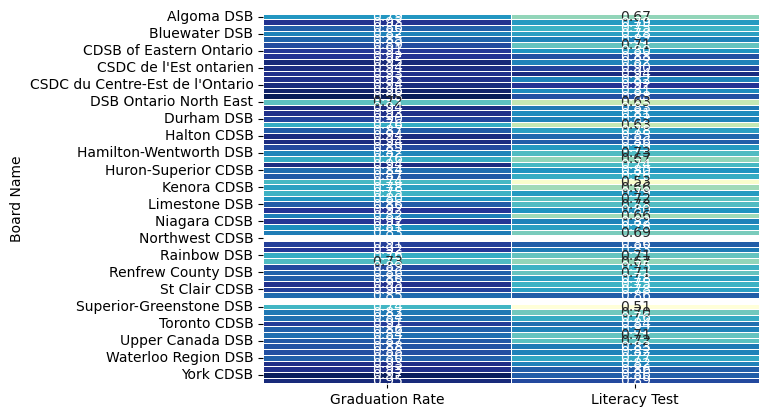

In [59]:
import seaborn as sns
merged_df_1 = pd.merge(merged_df, Grade_10_literacy_df, on ='Board Name')
merged_df_1
# Use the heatmap() function to create the heat map
sns.heatmap(merged_df_1.set_index("Board Name"), cmap="YlGnBu", annot=True, fmt='.2f', linewidths=.5, cbar=False)

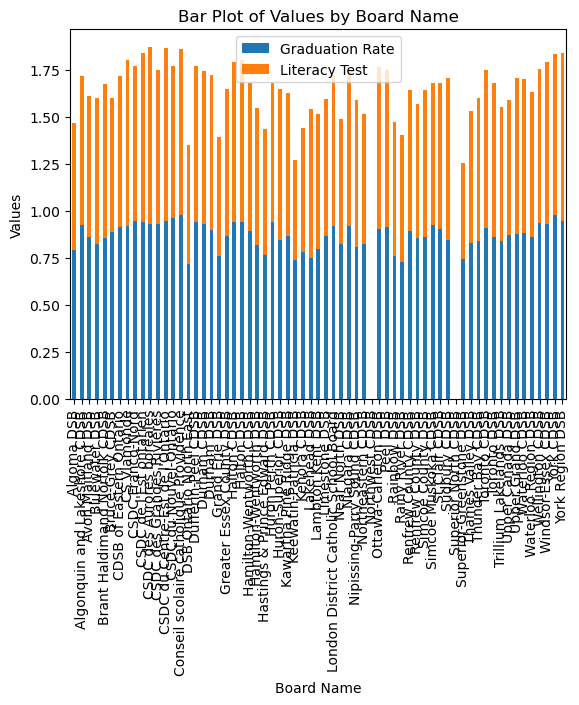

In [60]:
import matplotlib.pyplot as plt

merged_df_1.set_index("Board Name").plot(kind='bar', stacked=True)
plt.xlabel("Board Name")
plt.ylabel("Values")
plt.title("Bar Plot of Values by Board Name")
plt.show()

#In the above code, I first set the index of the dataframe to "Board Name" using .set_index("Board Name"). Then, I use the .plot() method to create a bar plot of the data, with the kind parameter set to 'bar'. I also used stacked=True which will stack the bars of each column on top of each other. Then I set xlabel and ylabel to "Board Name" and "Values" respectively and set the title of the plot to "Bar Plot of Values by Board Name". 

Finally, I use plt.show() to display the plot.

In [66]:
import matplotlib.pyplot as plt
# extract columns of interest
Provincial_School_data = r"C:\Users\Aarthi Manoharan\Arun\1 Project Day 1\fintech-project01\Data-Arun\Provincial_School_data_december2022.xlsx"
Provincial_School_df = pd.read_excel('Provincial_School_data_december2022.xlsx', sheet_name='SIF_2021prelim_EQAO1819_EN')


socio_economic =  Provincial_School_df[["Percentage of School-Aged Children Who Live in Low-Income Households", "Board Name" ]].groupby("Percentage of School-Aged Children Who Live in Low-Income Households").sum()
# Review the DataFrame
socio_economic

,Board Name
Percentage of School-Aged Children Who Live in Low-Income Households,
0,Algoma DSBAlgonquin and Lakeshore CDSBBloorvie...
10,Algoma DSBAlgoma DSBAlgoma DSBAlgoma DSBAlgoma...
11,Bluewater DSBBrant Haldimand Norfolk CDSBBruce...
12,Algonquin and Lakeshore CDSBAvon Maitland DSBB...
13,Algoma DSBBluewater DSBBruce-Grey CDSBCS catho...
14,Bluewater DSBBluewater DSBDSB NiagaraDufferin-...
15,Algoma DSBAlgoma DSBAlgoma DSBAlgoma DSBAlgoma...
16,Avon Maitland DSBDSB NiagaraDufferin-Peel CDSB...
17,Bluewater DSBCDSB of Eastern OntarioDSB Niagar...


In [62]:
import hvplot.pandas
socio_economic.hvplot.line(
    xlabel="Board Name",
    ylabel="Percentage of School-Aged Children Who Live in Low-Income Households",
    title="Socio Economic Comparison").opts(
    yformatter="%.0f")

:Curve   [Percentage of School-Aged Children Who Live in Low-Income Households]   (Board Name)